In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import date
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split # splitting the data
from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.metrics import classification_report # evaluation metric
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import feature_selection
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from matplotlib.colors import ListedColormap
from scipy import stats
import plotly.figure_factory as ff

In [ ]:
df = pd.read_csv('dsda_case_study_2019.csv')

In [ ]:
df_copy = df.copy()

In [ ]:
df.head()

,profile_id,primary_sales_product_type,first_booking_time,first_issued_time,last_booking_time,last_issued_time,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,random_number
0,3632279,HOTEL,1436705255370,1466304274396.0000000000,1538717915528,1538718482608.0000000000,2000822.7187500000,1193236.7777777778,32,18,0.0015619442
1,3632279,FLIGHT,1405686647701,1406077331494.0000000000,1545735395212,1545735761270.0000000000,1174168.9137931038,1031981.6666666665,58,33,0.0015619442
2,17407638,TRAIN,1493348364000,1493349147000.0000000000,1548320804000,1548322802000.0000000000,284884.2741935484,252776.1666666666,62,24,0.0042665520
3,17407638,HOTEL,1493361893998,1493362372547.0000000000,1547642393838,1547643603911.0000000000,737447.1944444445,587505.9545454546,36,22,0.0042665520
4,4618047,FLIGHT,1420511473189,1429178498531.0000000000,1546763512498,1542891221530.0000000000,1604697.6603773588,1443118.3000000000,53,20,0.0024599007


In [ ]:
df.groupby('profile_id').count()

,primary_sales_product_type,first_booking_time,first_issued_time,last_booking_time,last_issued_time,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,random_number
profile_id,,,,,,,,,,
80027,3,3,3,3,3,3,3,3,3,3
80138,1,1,1,1,1,1,1,1,1,1
80381,2,2,1,2,1,2,1,2,2,2
81680,1,1,1,1,1,1,1,1,1,1
81781,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...
104074145,1,1,0,1,0,1,0,1,1,1
104077873,1,1,1,1,1,1,1,1,1,1
104080871,1,1,0,1,0,1,0,1,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279149 entries, 0 to 279148
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   profile_id                      279149 non-null  int64  
 1   primary_sales_product_type      279149 non-null  object 
 2   first_booking_time              279149 non-null  int64  
 3   first_issued_time               206554 non-null  float64
 4   last_booking_time               279149 non-null  int64  
 5   last_issued_time                206554 non-null  float64
 6   avg_booking_invoice_amount_idr  279149 non-null  float64
 7   avg_issued_invoice_amount_idr   206554 non-null  float64
 8   count_booking                   279149 non-null  int64  
 9   count_issued                    279149 non-null  int64  
 10  random_number                   279149 non-null  float64
dtypes: float64(5), int64(5), object(1)
memory usage: 23.4+ MB


# Data Preprocessing

### Transform Unix Timestamp

In [ ]:
df['first_booking_time'] = pd.to_datetime(df['first_booking_time'], unit = 'ms')
df['first_issued_time'] = pd.to_datetime(df['first_issued_time'], unit = 'ms')
df['last_booking_time'] = pd.to_datetime(df['last_booking_time'], unit = 'ms')
df['last_issued_time'] = pd.to_datetime(df['last_issued_time'], unit = 'ms')

In [ ]:
df.head()

,profile_id,primary_sales_product_type,first_booking_time,first_issued_time,last_booking_time,last_issued_time,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,random_number
0,3632279,HOTEL,2015-07-12 12:47:35.370,2016-06-19 02:44:34.396,2018-10-05 05:38:35.528,2018-10-05 05:48:02.608,2000822.7187500000,1193236.7777777778,32,18,0.0015619442
1,3632279,FLIGHT,2014-07-18 12:30:47.701,2014-07-23 01:02:11.494,2018-12-25 10:56:35.212,2018-12-25 11:02:41.270,1174168.9137931038,1031981.6666666665,58,33,0.0015619442
2,17407638,TRAIN,2017-04-28 02:59:24.000,2017-04-28 03:12:27.000,2019-01-24 09:06:44.000,2019-01-24 09:40:02.000,284884.2741935484,252776.1666666666,62,24,0.0042665520
3,17407638,HOTEL,2017-04-28 06:44:53.998,2017-04-28 06:52:52.547,2019-01-16 12:39:53.838,2019-01-16 13:00:03.911,737447.1944444445,587505.9545454546,36,22,0.0042665520
4,4618047,FLIGHT,2015-01-06 02:31:13.189,2015-04-16 10:01:38.531,2019-01-06 08:31:52.498,2018-11-22 12:53:41.530,1604697.6603773588,1443118.3000000000,53,20,0.0024599007


### Dealing with Missing Values

In [ ]:
df.isnull().any()

profile_id                        False
primary_sales_product_type        False
first_booking_time                False
first_issued_time                  True
last_booking_time                 False
last_issued_time                   True
avg_booking_invoice_amount_idr    False
avg_issued_invoice_amount_idr      True
count_booking                     False
count_issued                      False
random_number                     False
dtype: bool

In [ ]:
df.isnull().sum()

profile_id                            0
primary_sales_product_type            0
first_booking_time                    0
first_issued_time                 72595
last_booking_time                     0
last_issued_time                  72595
avg_booking_invoice_amount_idr        0
avg_issued_invoice_amount_idr     72595
count_booking                         0
count_issued                          0
random_number                         0
dtype: int64

In [ ]:
df[df['first_issued_time'].isnull()].sort_values(by='first_booking_time', ascending = True)

,profile_id,primary_sales_product_type,first_booking_time,first_issued_time,last_booking_time,last_issued_time,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,random_number
29588,81889,FLIGHT,2013-03-08 07:53:46.297,NaT,2013-03-08 07:53:46.297,NaT,720865.0000000000,nan,1,0,0.0039092364
46452,83601,FLIGHT,2013-03-11 04:48:32.304,NaT,2013-03-11 04:48:32.304,NaT,601034.0000000000,nan,1,0,0.0022992544
68535,86001,FLIGHT,2013-03-14 05:20:14.506,NaT,2013-03-14 05:20:14.506,NaT,577106.0000000000,nan,1,0,0.0001248507
56435,97889,FLIGHT,2013-03-27 09:10:58.878,NaT,2013-03-27 09:10:58.878,NaT,1415861.0000000000,nan,1,0,0.0010546579
22461,120641,FLIGHT,2013-04-16 09:23:37.329,NaT,2013-04-16 09:23:37.329,NaT,498314.0000000000,nan,1,0,0.0009147493
...,...,...,...,...,...,...,...,...,...,...,...
61131,104084195,TRAIN,2019-02-01 21:43:11.000,NaT,2019-02-01 21:43:11.000,NaT,36004.0000000000,nan,1,0,0.0014177497
78364,3541528,TRAIN,2019-02-01 22:19:31.000,NaT,2019-02-01 22:19:31.000,NaT,203203.0000000000,nan,1,0,0.0000150917
31658,23799942,HOTEL,2019-02-01 22:23:13.975,NaT,2019-02-01 22:25:24.456,NaT,3357476.4720000001,nan,2,0,0.0028041520
80973,13705995,TRIP,2019-02-01 22:41:52.000,NaT,2019-02-01 22:46:28.000,NaT,2209966.5000000000,nan,2,0,0.0030952402


In [ ]:
# select only churned customers (non null last_issued_time)
df = df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206554 entries, 0 to 279148
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   profile_id                      206554 non-null  int64         
 1   primary_sales_product_type      206554 non-null  object        
 2   first_booking_time              206554 non-null  datetime64[ns]
 3   first_issued_time               206554 non-null  datetime64[ns]
 4   last_booking_time               206554 non-null  datetime64[ns]
 5   last_issued_time                206554 non-null  datetime64[ns]
 6   avg_booking_invoice_amount_idr  206554 non-null  float64       
 7   avg_issued_invoice_amount_idr   206554 non-null  float64       
 8   count_booking                   206554 non-null  int64         
 9   count_issued                    206554 non-null  int64         
 10  random_number                   206554 non-null  float64

In [ ]:
# drop average booking amt = 0 & avg invoice amt = 0, but first booking time is present
df = df[df['avg_booking_invoice_amount_idr'] != 0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206546 entries, 0 to 279148
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   profile_id                      206546 non-null  int64         
 1   primary_sales_product_type      206546 non-null  object        
 2   first_booking_time              206546 non-null  datetime64[ns]
 3   first_issued_time               206546 non-null  datetime64[ns]
 4   last_booking_time               206546 non-null  datetime64[ns]
 5   last_issued_time                206546 non-null  datetime64[ns]
 6   avg_booking_invoice_amount_idr  206546 non-null  float64       
 7   avg_issued_invoice_amount_idr   206546 non-null  float64       
 8   count_booking                   206546 non-null  int64         
 9   count_issued                    206546 non-null  int64         
 10  random_number                   206546 non-null  float64

### Add Last Updated Date

In [ ]:
df['last_updated_date']= pd.to_datetime('2019-02-01', format='%Y-%m-%d')

In [ ]:
df.dtypes

profile_id                                 int64
primary_sales_product_type                object
first_booking_time                datetime64[ns]
first_issued_time                 datetime64[ns]
last_booking_time                 datetime64[ns]
last_issued_time                  datetime64[ns]
avg_booking_invoice_amount_idr           float64
avg_issued_invoice_amount_idr            float64
count_booking                              int64
count_issued                               int64
random_number                            float64
last_updated_date                 datetime64[ns]
dtype: object

In [ ]:
df.head()

,profile_id,primary_sales_product_type,first_booking_time,first_issued_time,last_booking_time,last_issued_time,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,random_number,last_updated_date
0,3632279,HOTEL,2015-07-12 12:47:35.370,2016-06-19 02:44:34.396,2018-10-05 05:38:35.528,2018-10-05 05:48:02.608,2000822.7187500000,1193236.7777777778,32,18,0.0015619442,2019-02-01
1,3632279,FLIGHT,2014-07-18 12:30:47.701,2014-07-23 01:02:11.494,2018-12-25 10:56:35.212,2018-12-25 11:02:41.270,1174168.9137931038,1031981.6666666665,58,33,0.0015619442,2019-02-01
2,17407638,TRAIN,2017-04-28 02:59:24.000,2017-04-28 03:12:27.000,2019-01-24 09:06:44.000,2019-01-24 09:40:02.000,284884.2741935484,252776.1666666666,62,24,0.0042665520,2019-02-01
3,17407638,HOTEL,2017-04-28 06:44:53.998,2017-04-28 06:52:52.547,2019-01-16 12:39:53.838,2019-01-16 13:00:03.911,737447.1944444445,587505.9545454546,36,22,0.0042665520,2019-02-01
4,4618047,FLIGHT,2015-01-06 02:31:13.189,2015-04-16 10:01:38.531,2019-01-06 08:31:52.498,2018-11-22 12:53:41.530,1604697.6603773588,1443118.3000000000,53,20,0.0024599007,2019-02-01


In [ ]:
df['last_issued_date'] = pd.to_datetime(df['last_issued_time'].dt.date)
df['last_booking_date'] = pd.to_datetime(df['last_booking_time'].dt.date)
df['first_issued_date'] = pd.to_datetime(df['first_issued_time'].dt.date)
df['first_booking_date'] = pd.to_datetime(df['first_booking_time'].dt.date)

In [ ]:
df.dtypes

profile_id                                 int64
primary_sales_product_type                object
first_booking_time                datetime64[ns]
first_issued_time                 datetime64[ns]
last_booking_time                 datetime64[ns]
last_issued_time                  datetime64[ns]
avg_booking_invoice_amount_idr           float64
avg_issued_invoice_amount_idr            float64
count_booking                              int64
count_issued                               int64
random_number                            float64
last_updated_date                 datetime64[ns]
last_issued_date                  datetime64[ns]
last_booking_date                 datetime64[ns]
first_issued_date                 datetime64[ns]
first_booking_date                datetime64[ns]
dtype: object

In [ ]:
df.isna().any()

profile_id                        False
primary_sales_product_type        False
first_booking_time                False
first_issued_time                 False
last_booking_time                 False
last_issued_time                  False
avg_booking_invoice_amount_idr    False
avg_issued_invoice_amount_idr     False
count_booking                     False
count_issued                      False
random_number                     False
last_updated_date                 False
last_issued_date                  False
last_booking_date                 False
first_issued_date                 False
first_booking_date                False
dtype: bool

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

### Quick Descriptive Analysis

In [ ]:
df.drop('profile_id', axis = 1).describe()

,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,random_number
count,206546.00000,206546.00000,206546.00000,206546.00000,206546.00000
mean,1176956.97514,1118113.82978,13.84774,6.98084,0.00250
std,1643688.03535,1484782.69417,32.93616,20.31540,0.00144
min,4173.96916,0.00000,1.00000,1.00000,0.00000
25%,434579.41667,408101.39423,2.00000,1.00000,0.00125
50%,799270.25000,753177.10000,5.00000,2.00000,0.00249
75%,1375946.88889,1310237.84814,14.00000,6.00000,0.00375
max,191527701.53195,88993002.50000,4308.00000,3132.00000,0.00500


### Add Lables Churn and No Churn

In [ ]:
# day of churned customers (2019-02-01 minus last issued date)
df['day_diff'] = df['last_updated_date'] - df['last_issued_date']
# day difference between last and first booking time
df['day_diff_booking_time'] = df['last_booking_date'] - df['first_booking_date']
# day difference between last and first issued time
df['day_diff_issue_time'] = df['last_issued_date'] - df['first_issued_date']
# conversion rate (# of issued invoice / # of booking)
df['cvr'] = df['count_issued'] / df['count_booking']

### Convert Days from String to Int

In [ ]:
df['day_diff'] = df.day_diff / np.timedelta64(1, 'D')
df['day_diff_booking_time'] = df.day_diff_booking_time / np.timedelta64(1, 'D')
df['day_diff_issue_time'] = df.day_diff_issue_time / np.timedelta64(1, 'D')
df['day_diff'].astype(int)
df['day_diff_booking_time'].astype(int)
df['day_diff_issue_time'].astype(int)

0          838
1         1616
2          636
3          628
4         1316
          ... 
279144     214
279145     362
279146     436
279147     519
279148    1493
Name: day_diff_issue_time, Length: 206546, dtype: int32

In [ ]:
## Set churn vs no churn
df['label'] = np.where(df['day_diff'] > 365, 1, 0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206546 entries, 0 to 279148
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   profile_id                      206546 non-null  int64         
 1   primary_sales_product_type      206546 non-null  object        
 2   first_booking_time              206546 non-null  datetime64[ns]
 3   first_issued_time               206546 non-null  datetime64[ns]
 4   last_booking_time               206546 non-null  datetime64[ns]
 5   last_issued_time                206546 non-null  datetime64[ns]
 6   avg_booking_invoice_amount_idr  206546 non-null  float64       
 7   avg_issued_invoice_amount_idr   206546 non-null  float64       
 8   count_booking                   206546 non-null  int64         
 9   count_issued                    206546 non-null  int64         
 10  random_number                   206546 non-null  float64

# EDA

In [ ]:
df.head()

,profile_id,primary_sales_product_type,first_booking_time,first_issued_time,last_booking_time,last_issued_time,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,...,last_updated_date,last_issued_date,last_booking_date,first_issued_date,first_booking_date,day_diff,day_diff_booking_time,day_diff_issue_time,cvr,label
0,3632279,HOTEL,2015-07-12 12:47:35.370,2016-06-19 02:44:34.396,2018-10-05 05:38:35.528,2018-10-05 05:48:02.608,2000822.71875,1193236.77778,32,18,...,2019-02-01,2018-10-05,2018-10-05,2016-06-19,2015-07-12,119.00000,1181.00000,838.00000,0.56250,0
1,3632279,FLIGHT,2014-07-18 12:30:47.701,2014-07-23 01:02:11.494,2018-12-25 10:56:35.212,2018-12-25 11:02:41.270,1174168.91379,1031981.66667,58,33,...,2019-02-01,2018-12-25,2018-12-25,2014-07-23,2014-07-18,38.00000,1621.00000,1616.00000,0.56897,0
2,17407638,TRAIN,2017-04-28 02:59:24.000,2017-04-28 03:12:27.000,2019-01-24 09:06:44.000,2019-01-24 09:40:02.000,284884.27419,252776.16667,62,24,...,2019-02-01,2019-01-24,2019-01-24,2017-04-28,2017-04-28,8.00000,636.00000,636.00000,0.38710,0
3,17407638,HOTEL,2017-04-28 06:44:53.998,2017-04-28 06:52:52.547,2019-01-16 12:39:53.838,2019-01-16 13:00:03.911,737447.19444,587505.95455,36,22,...,2019-02-01,2019-01-16,2019-01-16,2017-04-28,2017-04-28,16.00000,628.00000,628.00000,0.61111,0
4,4618047,FLIGHT,2015-01-06 02:31:13.189,2015-04-16 10:01:38.531,2019-01-06 08:31:52.498,2018-11-22 12:53:41.530,1604697.66038,1443118.30000,53,20,...,2019-02-01,2018-11-22,2019-01-06,2015-04-16,2015-01-06,71.00000,1461.00000,1316.00000,0.37736,0


In [ ]:
df.drop('profile_id', axis = 1).describe()

,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,random_number,day_diff,day_diff_booking_time,day_diff_issue_time,cvr,label
count,206546.00000,206546.00000,206546.00000,206546.00000,206546.00000,206546.00000,206546.00000,206546.00000,206546.00000,206546.00000
mean,1176956.97514,1118113.82978,13.84774,6.98084,0.00250,360.43773,330.90030,260.55432,0.60668,0.39767
std,1643688.03535,1484782.69417,32.93616,20.31540,0.00144,337.75427,408.29037,372.52849,0.29223,0.48942
min,4173.96916,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00125,0.00000
25%,434579.41667,408101.39423,2.00000,1.00000,0.00125,86.00000,1.00000,0.00000,0.35000,0.00000
50%,799270.25000,753177.10000,5.00000,2.00000,0.00249,262.00000,167.00000,57.00000,0.57143,0.00000
75%,1375946.88889,1310237.84814,14.00000,6.00000,0.00375,550.00000,530.00000,416.00000,1.00000,1.00000
max,191527701.53195,88993002.50000,4308.00000,3132.00000,0.00500,2115.00000,2104.00000,2084.00000,1.00000,1.00000


### Distribution of Days Since Last Issued Invoice

Text(0, 0.5, '% of Observations')

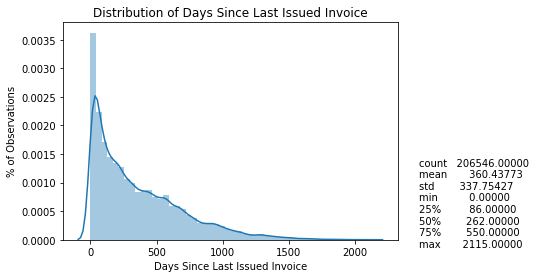

In [ ]:
ax = sns.distplot(df['day_diff'])
plt.figtext(0.95, 0.10, df['day_diff'].describe().to_string())
plt.title('Distribution of Days Since Last Issued Invoice')
plt.xlabel('Days Since Last Issued Invoice')
plt.ylabel('% of Observations')

### Distribution of Features by Product Type

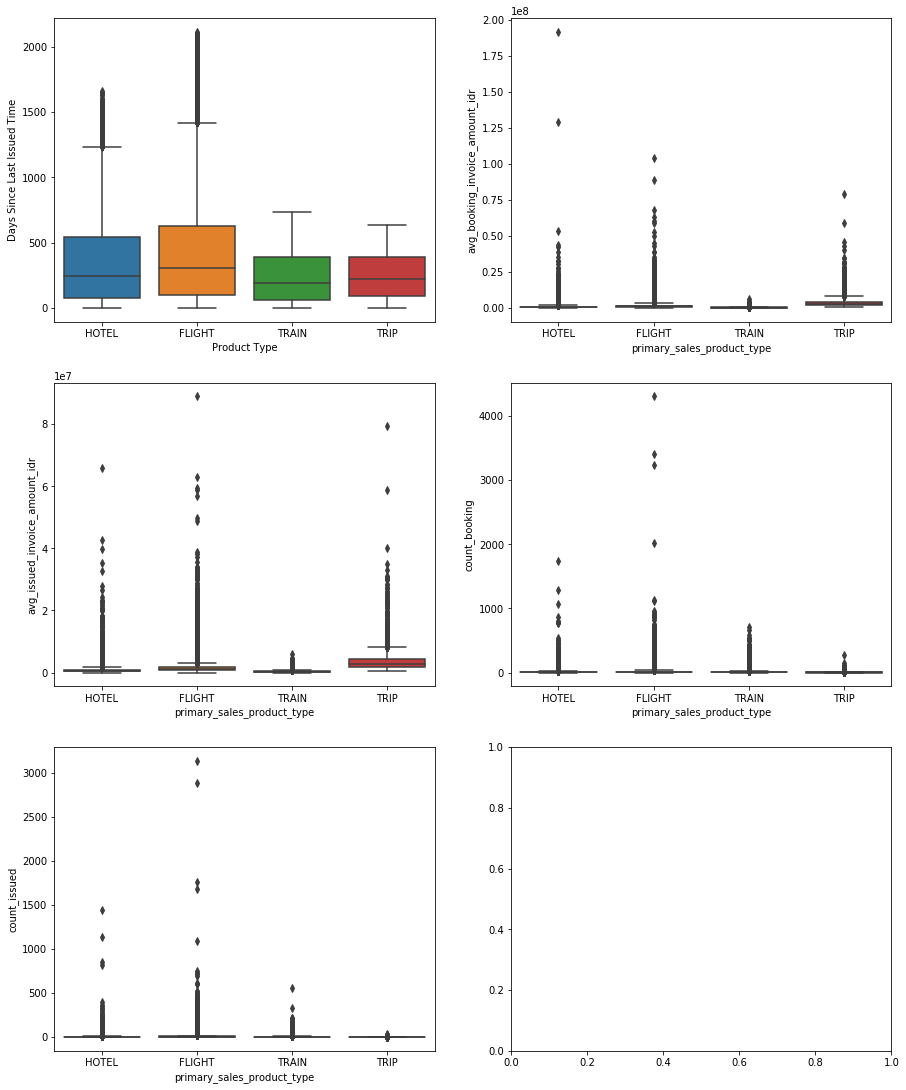

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(15,19))
with sns.axes_style(style='ticks'):
    sns.boxplot("primary_sales_product_type", "day_diff", data=df, ax = ax [0,0])
    ax[0,0].set(xlabel='Product Type', ylabel='Days Since Last Issued Time')
    sns.boxplot("primary_sales_product_type", "avg_booking_invoice_amount_idr", data=df, ax = ax[0,1])
    sns.boxplot("primary_sales_product_type", "avg_issued_invoice_amount_idr", data=df, ax = ax[1, 0])
    sns.boxplot("primary_sales_product_type", "count_booking", data=df, ax = ax[1, 1])
    sns.boxplot("primary_sales_product_type", "count_issued", data=df, ax = ax[2, 0])
plt.show()
# set_axis_labels("Product Type", "Days of Churned Customers")

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [ ]:
df_describe = df.groupby("primary_sales_product_type").describe().transpose().drop(['profile_id', 'random_number', 'label'])
df_describe.head(100)

primary_sales_product_type                  FLIGHT         HOTEL        TRAIN  \
avg_booking_invoice_amount_idr count  103839.00000   66208.00000  32731.00000   
                               mean  1537078.73743  876738.31919 336930.91171   
                               std   1679646.38589 1442108.82445 310438.33086   
                               min     77414.00000    4173.96916   9986.33333   
                               25%    761773.63333  379714.85714 154839.75000   
...                                            ...           ...          ...   
cvr                            min         0.00483       0.00125      0.00249   
                               25%         0.44444       0.33333      0.33333   
                               50%         0.66667       0.50000      0.50000   
                               75%         1.00000       0.75000      1.00000   
                               max         1.00000       1.00000      1.00000   

primary_sales_product_type                    TRIP  
avg_booking_invoice_amount_idr count    3768.00000  
                               mean  3824803.62611  
                               std   3830909.73656  
                               min    389396.00000  
                               25%   1882822.37500  
...                                            ...  
cvr                            min         0.00962  
                               25%         0.33333  
                               50%         0.50000  
                               75%         1.00000  
                               max         1.00000  

[64 rows x 4 columns]

### % of Churn vs No Churn Customers

In [ ]:
## Number of Customers who churn vs no churn by Product Type
df_churn_detail = df.groupby(['label', 'primary_sales_product_type']).agg({'profile_id':'nunique'})
df_churn_detail

profile_id
label primary_sales_product_type            
0     FLIGHT                           57489
      HOTEL                            40288
      TRAIN                            23545
      TRIP                              2698
1     FLIGHT                           46134
      HOTEL                            25734
      TRAIN                             9056
      TRIP                              1055

In [ ]:
df_churn_detail = df_churn_detail.groupby(level=1).apply(lambda x: 100 * x/ float(x.sum())).reset_index()

In [ ]:
df_churn_detail

,label,primary_sales_product_type,profile_id
0,0,FLIGHT,55.47900
1,0,HOTEL,61.02208
2,0,TRAIN,72.22171
3,0,TRIP,71.88916
4,1,FLIGHT,44.52100
5,1,HOTEL,38.97792
6,1,TRAIN,27.77829
7,1,TRIP,28.11084


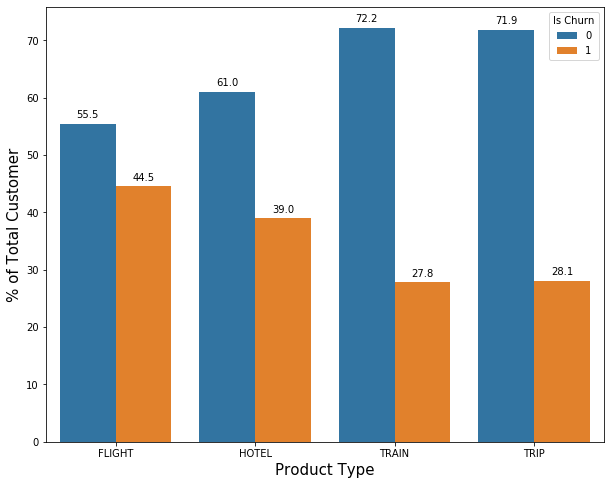

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='primary_sales_product_type', y='profile_id', hue= 'label',  data = df_churn_detail, )
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.ylabel('% of Total Customer', fontsize=15)
plt.xlabel('Product Type', fontsize = 15)
plt.legend(title='Is Churn')

In [ ]:
df_churn = df.groupby('label').agg({'profile_id':'nunique'}).apply(lambda x: 100* x/float(x.sum())).reset_index()
df_churn

,label,profile_id
0,0,54.95536
1,1,45.04464


Text(0.5, 0, 'Is Churn')

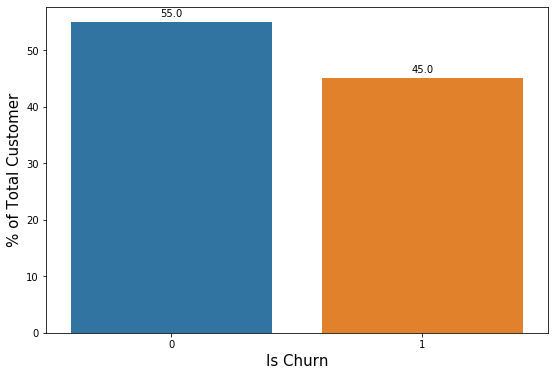

In [ ]:
plt.figure(figsize=(9, 6))
ax = sns.barplot(x='label', y='profile_id',  data = df_churn)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')
plt.ylabel('% of Total Customer', fontsize=15)
plt.xlabel('Is Churn', fontsize = 15)

### Remove Outlier to Show Distribution

In [ ]:
df_flight = df[df['primary_sales_product_type'] == 'FLIGHT']
df_hotel = df[df['primary_sales_product_type'] == 'HOTEL']
df_train = df[df['primary_sales_product_type'] == 'TRAIN']
df_trip = df[df['primary_sales_product_type'] == 'TRIP']

In [ ]:
z = np.abs(stats.zscore(df_flight[['avg_booking_invoice_amount_idr']]))
df_flight = df_flight[(z < 3).all(axis=1)]
z1 = np.abs(stats.zscore(df_flight[['avg_issued_invoice_amount_idr']]))
df_flight = df_flight[(z1 < 3).all(axis=1)]
z2 = np.abs(stats.zscore(df_flight[['count_booking']]))
df_flight = df_flight[(z2 < 3).all(axis=1)]

In [ ]:
z = np.abs(stats.zscore(df_hotel[['avg_booking_invoice_amount_idr']]))
df_hotel = df_hotel[(z < 3).all(axis=1)]
z1 = np.abs(stats.zscore(df_hotel[['avg_issued_invoice_amount_idr']]))
df_hotel = df_hotel[(z1 < 3).all(axis=1)]
z2 = np.abs(stats.zscore(df_hotel[['count_booking']]))
df_hotel = df_hotel[(z2 < 3).all(axis=1)]

In [ ]:
z = np.abs(stats.zscore(df_train[['avg_booking_invoice_amount_idr']]))
df_train = df_train[(z < 3).all(axis=1)]
z1 = np.abs(stats.zscore(df_train[['avg_issued_invoice_amount_idr']]))
df_train = df_train[(z1 < 3).all(axis=1)]
z2 = np.abs(stats.zscore(df_train[['count_booking']]))
df_train = df_train[(z2 < 3).all(axis=1)]

In [ ]:
z = np.abs(stats.zscore(df_trip[['avg_booking_invoice_amount_idr']]))
df_trip = df_trip[(z < 3).all(axis=1)]
z1 = np.abs(stats.zscore(df_trip[['avg_issued_invoice_amount_idr']]))
df_trip = df_trip[(z1 < 3).all(axis=1)]
z2 = np.abs(stats.zscore(df_trip[['count_booking']]))
df_trip = df_trip[(z2 < 3).all(axis=1)]

In [ ]:
z = np.abs(stats.zscore(df[['avg_booking_invoice_amount_idr']]))
df_overall = df[(z < 3).all(axis=1)]
z1 = np.abs(stats.zscore(df_overall[['avg_issued_invoice_amount_idr']]))
df_overall = df_overall[(z1 < 3).all(axis=1)]
z2 = np.abs(stats.zscore(df_overall[['count_booking']]))
df_overall = df_overall[(z2 < 3).all(axis=1)]

### Distribution of Features by Product Type After Removing Outlier

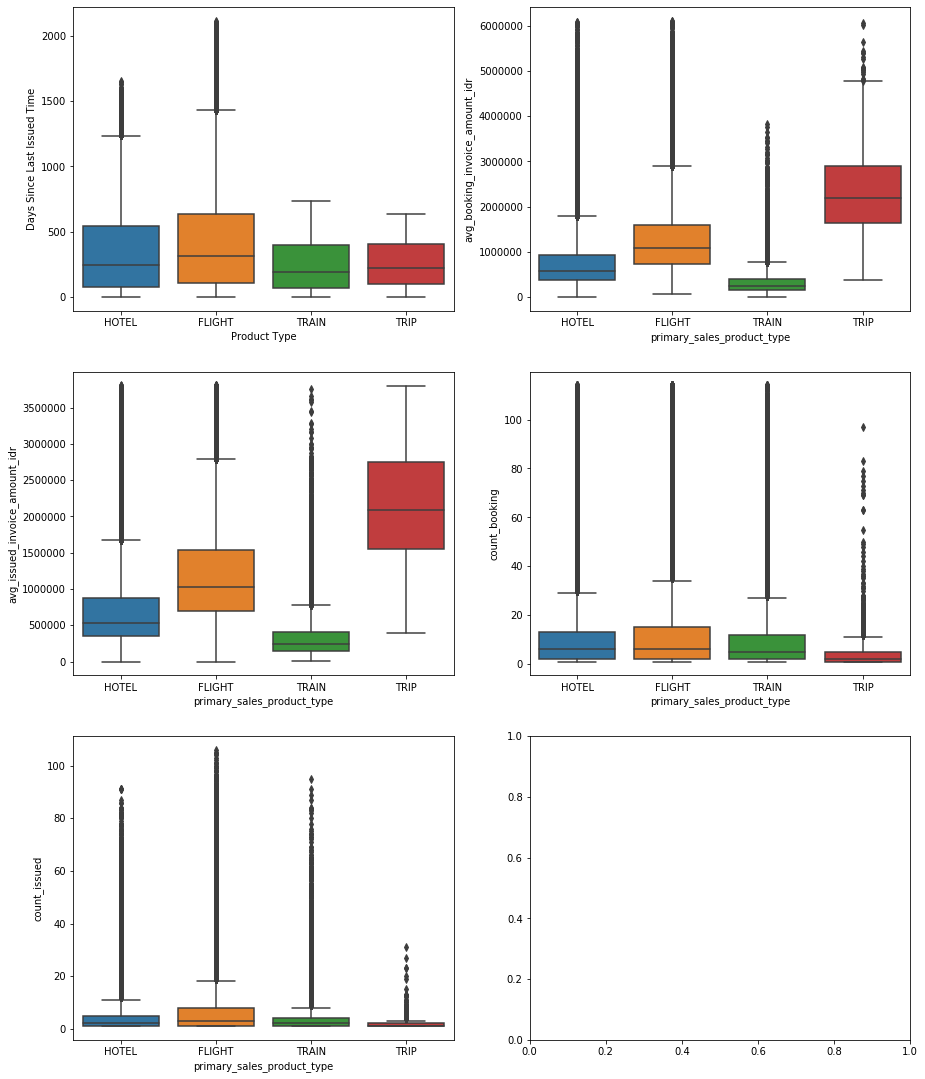

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(15,19))
with sns.axes_style(style='ticks'):
    sns.boxplot("primary_sales_product_type", "day_diff", data=df_overall, ax = ax [0,0])
    ax[0,0].set(xlabel='Product Type', ylabel='Days Since Last Issued Time')
    sns.boxplot("primary_sales_product_type", "avg_booking_invoice_amount_idr", data=df_overall, ax = ax[0,1])
    sns.boxplot("primary_sales_product_type", "avg_issued_invoice_amount_idr", data=df_overall, ax = ax[1, 0])
    sns.boxplot("primary_sales_product_type", "count_booking", data=df_overall, ax = ax[1, 1])
    sns.boxplot("primary_sales_product_type", "count_issued", data=df_overall, ax = ax[2, 0])
plt.show()
# set_axis_labels("Product Type", "Days of Churned Customers")

### Feature Distribution Between Churn vs No Churn (FLIGHT)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F4B1DFBBC8>,
      dtype=object)

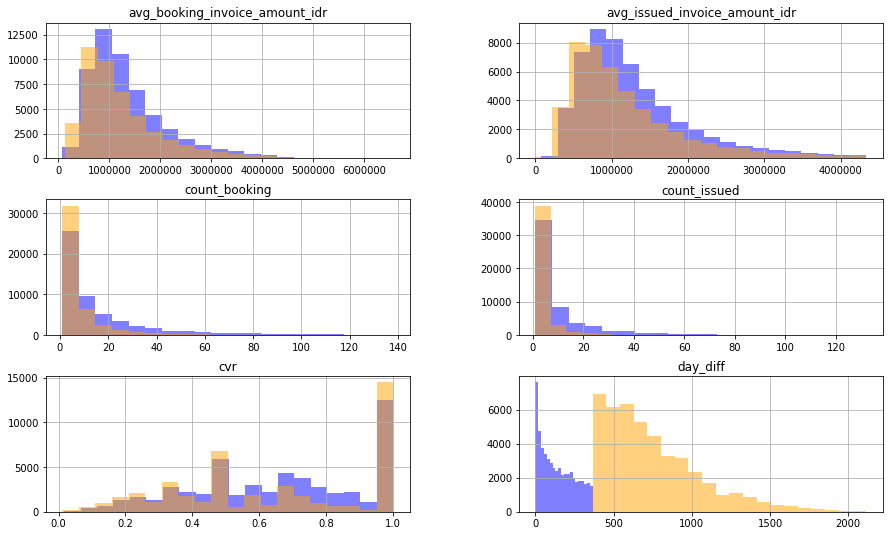

In [ ]:
numerical_features = ['avg_booking_invoice_amount_idr', 'avg_issued_invoice_amount_idr', 'count_booking', 'count_issued', 'cvr', 'day_diff']
fig, ax = plt.subplots(3, 2, figsize=(15, 9))
df_flight[(df_flight.label == 0) & (df_flight.primary_sales_product_type == 'FLIGHT')][numerical_features].hist(bins=20, color="blue", alpha=0.5, ax=ax)
df_flight[(df_flight.label == 1) & (df_flight.primary_sales_product_type == 'FLIGHT')][numerical_features].hist(bins=20, color="orange", alpha=0.5, ax=ax)

C:\Users\Nakama\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Nakama\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F4A94F3F88>,
      dtype=object)

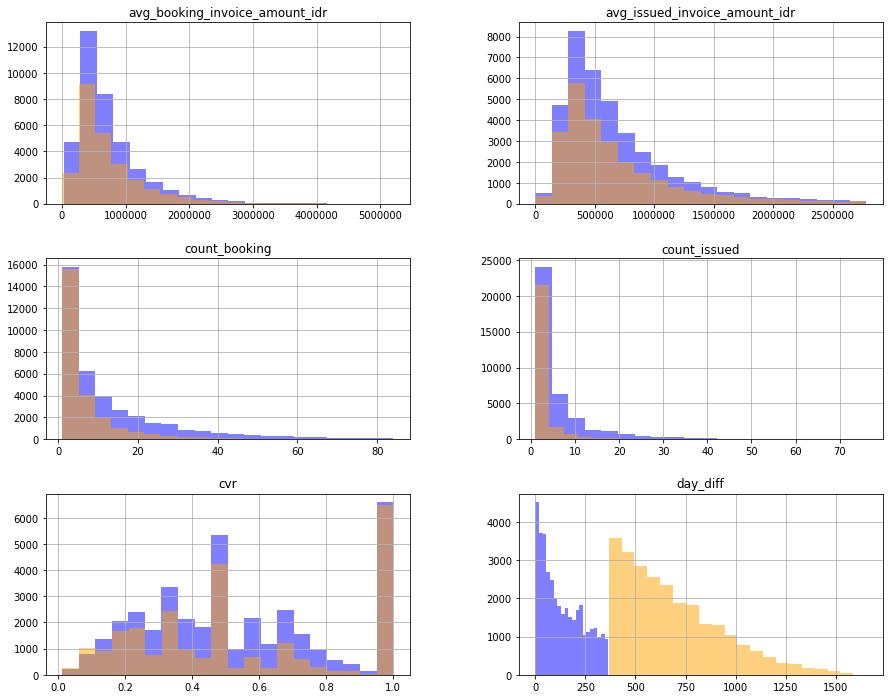

In [ ]:
numerical_features = ['avg_booking_invoice_amount_idr', 'avg_issued_invoice_amount_idr', 'count_booking', 'count_issued', 'cvr','day_diff']
fig, ax = plt.subplots(3, 2, figsize=(15, 12))
df_hotel[(df.label == 0) & (df_hotel.primary_sales_product_type == 'HOTEL')][numerical_features].hist(bins=20, color="blue", alpha=0.5, ax=ax)
df_hotel[(df.label == 1) & (df_hotel.primary_sales_product_type == 'HOTEL')][numerical_features].hist(bins=20, color="orange", alpha=0.5, ax=ax)

C:\Users\Nakama\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Nakama\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F4C13D3888>,
      dtype=object)

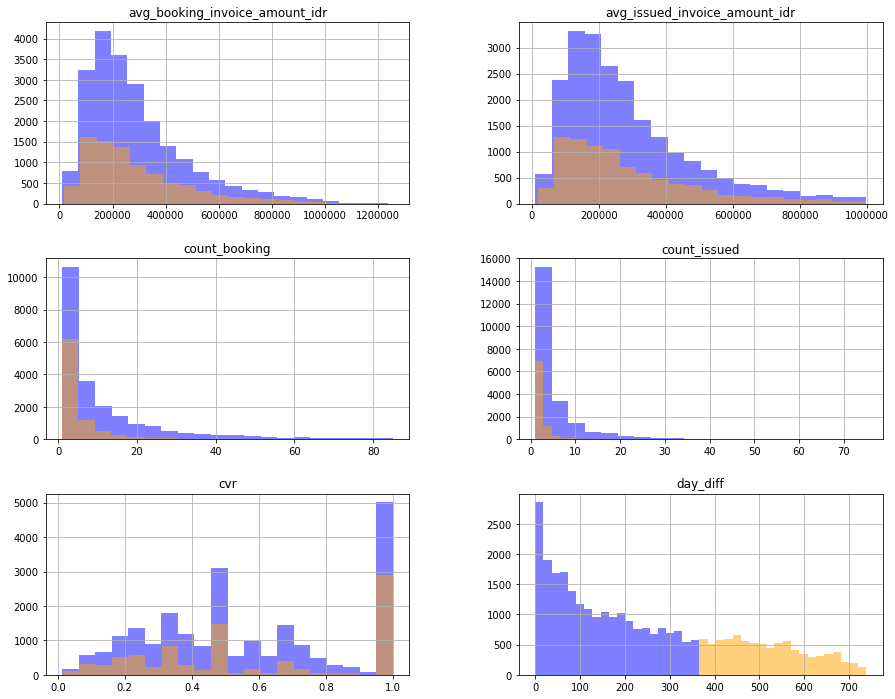

In [ ]:
numerical_features = ['avg_booking_invoice_amount_idr', 'avg_issued_invoice_amount_idr', 'count_booking', 'count_issued', 'cvr', 'day_diff']
fig, ax = plt.subplots(3, 2, figsize=(15, 12))
df_train[(df.label == 0) & (df_train.primary_sales_product_type == 'TRAIN')][numerical_features].hist(bins=20, color="blue", alpha=0.5, ax=ax)
df_train[(df.label == 1) & (df_train.primary_sales_product_type == 'TRAIN')][numerical_features].hist(bins=20, color="orange", alpha=0.5, ax=ax)

C:\Users\Nakama\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

C:\Users\Nakama\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F4CB86DC48>,
      dtype=object)

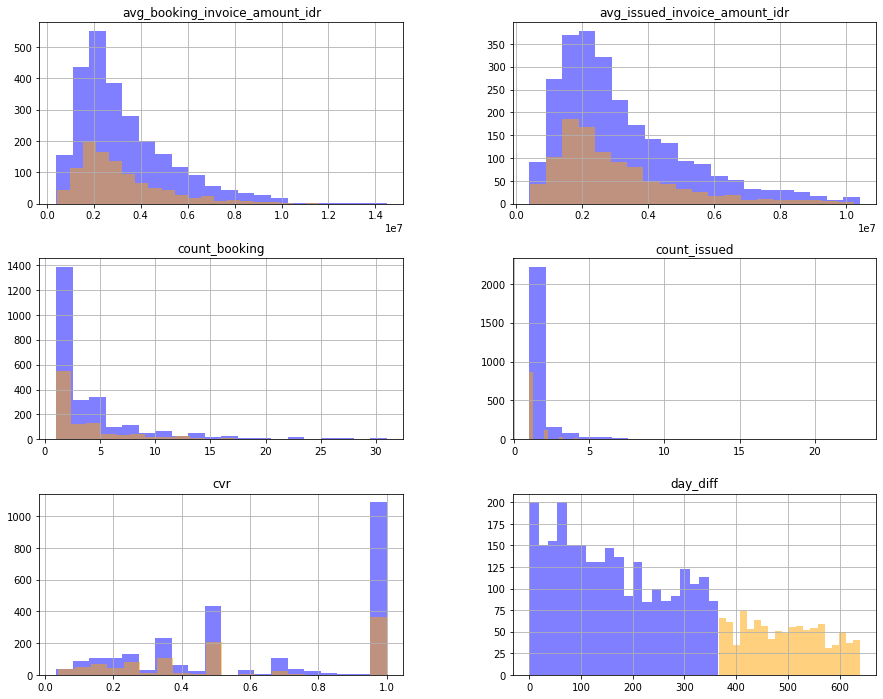

In [ ]:
numerical_features = ['avg_booking_invoice_amount_idr', 'avg_issued_invoice_amount_idr', 'count_booking', 'count_issued', 'cvr', 'day_diff']
fig, ax = plt.subplots(3, 2, figsize=(15, 12))
df_trip[(df.label == 0) & (df_trip.primary_sales_product_type == 'TRIP')][numerical_features].hist(bins=20, color="blue", alpha=0.5, ax=ax)
df_trip[(df.label == 1) & (df_trip.primary_sales_product_type == 'TRIP')][numerical_features].hist(bins=20, color="orange", alpha=0.5, ax=ax)

In [ ]:
df_flight_describe = df_flight.groupby(["primary_sales_product_type", 'label']).describe().transpose().drop(['profile_id', 'random_number','cvr'])
df_flight_describe

primary_sales_product_type                  FLIGHT              
label                                            0             1
avg_booking_invoice_amount_idr count   54343.00000   44382.00000
                               mean  1386498.35281 1234629.09860
                               std    830328.18992  811274.83969
                               min     77414.00000  134299.25187
                               25%    816458.65848  672424.25000
                               50%   1159969.00000 1000053.30000
                               75%   1710097.87500 1530413.33333
                               max   6575500.00000 6507602.42857
avg_issued_invoice_amount_idr  count   54343.00000   44382.00000
                               mean  1317068.17131 1176212.24801
                               std    763986.25941  770256.21601
                               min     77414.00000       0.00000
                               25%    776803.00357  635378.25000
                               50%   1112412.00000  950758.75000
                               75%   1634457.23333 1467455.62500
                               max   4335345.00000 4334981.00000
count_booking                  count   54343.00000   44382.00000
                               mean       17.37841       7.98743
                               std        22.90672      12.70968
                               min         1.00000       1.00000
                               25%         3.00000       2.00000
                               50%         8.00000       4.00000
                               75%        22.00000       9.00000
                               max       138.00000     138.00000
count_issued                   count   54343.00000   44382.00000
                               mean       10.34529       4.04355
                               std        14.84676       6.79273
                               min         1.00000       1.00000
                               25%         2.00000       1.00000
                               50%         5.00000       2.00000
                               75%        12.00000       4.00000
                               max       132.00000     122.00000
day_diff                       count   54343.00000   44382.00000
                               mean      140.02878     747.00430
                               std       107.30284     306.29725
                               min         0.00000     366.00000
                               25%        42.00000     511.00000
                               50%       121.00000     674.00000
                               75%       226.00000     913.00000
                               max       365.00000    2115.00000
day_diff_booking_time          count   54343.00000   44382.00000
                               mean      504.68557     244.32748
                               std       493.65774     348.26874
                               min         0.00000       0.00000
                               25%        42.00000       0.00000
                               50%       379.00000      70.00000
                               75%       821.00000     372.00000
                               max      2093.00000    2051.00000
day_diff_issue_time            count   54343.00000   44382.00000
                               mean      439.04586     155.79046
                               std       463.64785     268.66807
                               min         0.00000       0.00000
                               25%         3.00000       0.00000
                               50%       306.00000       5.00000
                               75%       723.00000     207.00000
                               max      2084.00000    1672.00000

In [ ]:
df_hotel_describe = df_hotel.groupby(["primary_sales_product_type", 'label']).describe().transpose().drop(['profile_id', 'random_number','cvr'])
df_hotel_describe

primary_sales_product_type                   HOTEL              
label                                            0             1
avg_booking_invoice_amount_idr count   38253.00000   24880.00000
                               mean   738311.66826  725265.31985
                               std    536446.58501  543653.00850
                               min     30462.00000    4173.96916
                               25%    379165.67742  364092.91667
                               50%    577920.83784  551905.32308
                               75%    921275.00000  904388.47368
                               max   5197393.75199 5137783.60000
avg_issued_invoice_amount_idr  count   38253.00000   24880.00000
                               mean   681230.50173  670588.61077
                               std    478885.31519  490090.86846
                               min         0.00000       0.00000
                               25%    349306.22222  336265.25000
                               50%    535340.57143  509792.23501
                               75%    857778.75000  840566.50000
                               max   2782757.94153 2779590.00000
count_booking                  count   38253.00000   24880.00000
                               mean       13.16501       6.87528
                               std        15.08459       8.74143
                               min         1.00000       1.00000
                               25%         3.00000       2.00000
                               50%         7.00000       4.00000
                               75%        17.00000       8.00000
                               max        84.00000      83.00000
count_issued                   count   38253.00000   24880.00000
                               mean        5.91308       2.63850
                               std         7.72492       3.55741
                               min         1.00000       1.00000
                               25%         1.00000       1.00000
                               50%         3.00000       1.00000
                               75%         7.00000       3.00000
                               max        76.00000      65.00000
day_diff                       count   38253.00000   24880.00000
                               mean      134.71597     685.79128
                               std       104.47500     251.00973
                               min         0.00000     366.00000
                               25%        42.00000     482.00000
                               50%       110.00000     630.00000
                               75%       217.00000     835.00000
                               max       365.00000    1652.00000
day_diff_booking_time          count   38253.00000   24880.00000
                               mean      398.29386     193.81226
                               std       400.32138     275.79364
                               min         0.00000       0.00000
                               25%        13.00000       0.00000
                               50%       295.00000      47.00000
                               75%       661.00000     309.00000
                               max      1646.00000    1570.00000
day_diff_issue_time            count   38253.00000   24880.00000
                               mean      327.65516     101.09614
                               std       378.08383     192.80366
                               min         0.00000       0.00000
                               25%         0.00000       0.00000
                               50%       186.00000       0.00000
                               75%       559.00000     119.00000
                               max      1643.00000    1156.00000

In [ ]:
df_train_describe = df_train.groupby(["primary_sales_product_type", 'label']).describe().transpose().drop(['profile_id', 'random_number','cvr'])
df_train_describe

primary_sales_product_type                   TRAIN              
label                                            0             1
avg_booking_invoice_amount_idr count   22173.00000    8670.00000
                               mean   293262.13833  291779.87699
                               std    194088.34281  200280.92105
                               min      9986.33333   16744.00000
                               25%    154018.00000  146886.35811
                               50%    241673.41176  234204.00000
                               75%    374847.00000  379457.37500
                               max   1239984.55556 1257464.14286
avg_issued_invoice_amount_idr  count   22173.00000    8670.00000
                               mean   287350.68767  286463.50155
                               std    191807.82974  201397.39686
                               min      9986.33333   16920.33333
                               25%    148520.00000  134713.12500
                               50%    234835.50000  228951.50000
                               75%    372894.66667  379456.50000
                               max    998209.00000  996864.00000
count_booking                  count   22173.00000    8670.00000
                               mean       11.48568       5.55006
                               std        14.35553       7.60374
                               min         1.00000       1.00000
                               25%         2.00000       1.00000
                               50%         6.00000       3.00000
                               75%        14.00000       6.00000
                               max        85.00000      84.00000
count_issued                   count   22173.00000    8670.00000
                               mean        4.91097       2.02549
                               std         6.47806       2.13878
                               min         1.00000       1.00000
                               25%         1.00000       1.00000
                               50%         2.00000       1.00000
                               75%         6.00000       2.00000
                               max        75.00000      38.00000
day_diff                       count   22173.00000    8670.00000
                               mean      137.57493     518.72584
                               std       105.09874      98.25180
                               min         0.00000     366.00000
                               25%        45.00000     436.00000
                               50%       116.00000     508.00000
                               75%       218.00000     592.00000
                               max       365.00000     738.00000
day_diff_booking_time          count   22173.00000    8670.00000
                               mean      209.61480      76.90358
                               std       216.90399     134.44947
                               min         0.00000       0.00000
                               25%         1.00000       0.00000
                               50%       143.00000       3.00000
                               75%       382.00000     102.00000
                               max       735.00000     728.00000
day_diff_issue_time            count   22173.00000    8670.00000
                               mean      173.80896      27.67866
                               std       205.39771      61.30970
                               min         0.00000       0.00000
                               25%         0.00000       0.00000
                               50%        73.00000       0.00000
                               75%       331.00000      13.00000
                               max       735.00000     364.00000

In [ ]:
df_trip_describe = df_trip.groupby(["primary_sales_product_type", 'label']).describe().transpose().drop(['profile_id', 'random_number','cvr'])
df_trip_describe

primary_sales_product_type                     TRIP               
label                                             0              1
avg_booking_invoice_amount_idr count     2560.00000     1018.00000
                               mean   3316657.98122  3115514.01077
                               std    2021294.27676  1853030.70639
                               min     389396.00000   414254.00000
                               25%    1849474.25000  1826447.25000
                               50%    2746439.73529  2622027.66667
                               75%    4257305.93250  3930118.25000
                               max   14486045.50000 11594207.40000
avg_issued_invoice_amount_idr  count     2560.00000     1018.00000
                               mean   3201928.51815  2963398.43679
                               std    1964538.92833  1823005.93383
                               min     389396.00000   414254.00000
                               25%    1792402.50000  1696896.50000
                               50%    2630978.50000  2414747.00000
                               75%    4191354.55997  3699416.50000
                               max   10410476.00000 10237337.00000
count_booking                  count     2560.00000     1018.00000
                               mean         3.95234        3.81729
                               std          4.60135        4.05372
                               min          1.00000        1.00000
                               25%          1.00000        1.00000
                               50%          2.00000        2.00000
                               75%          5.00000        5.00000
                               max         31.00000       28.00000
count_issued                   count     2560.00000     1018.00000
                               mean         1.62539        1.21316
                               std          1.47266        0.60051
                               min          1.00000        1.00000
                               25%          1.00000        1.00000
                               50%          1.00000        1.00000
                               75%          2.00000        1.00000
                               max         23.00000        6.00000
day_diff                       count     2560.00000     1018.00000
                               mean       159.76094      493.20334
                               std        105.88841       77.97127
                               min          0.00000      366.00000
                               25%         66.00000      425.25000
                               50%        148.00000      491.00000
                               75%        249.00000      556.00000
                               max        365.00000      639.00000
day_diff_booking_time          count     2560.00000     1018.00000
                               mean        84.57852       55.54813
                               std        144.09473      115.45668
                               min          0.00000        0.00000
                               25%          0.00000        0.00000
                               50%          0.00000        0.00000
                               75%        122.50000       44.75000
                               max        635.00000      622.00000
day_diff_issue_time            count     2560.00000     1018.00000
                               mean        54.88750        9.78193
                               std        119.73053       34.42255
                               min          0.00000        0.00000
                               25%          0.00000        0.00000
                               50%          0.00000        0.00000
                               75%         22.00000        0.00000
                               max        625.00000      249.00000

###  Pearson Correlation between Independent Variables

C:\Users\Nakama\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



(8.0, 0.0)

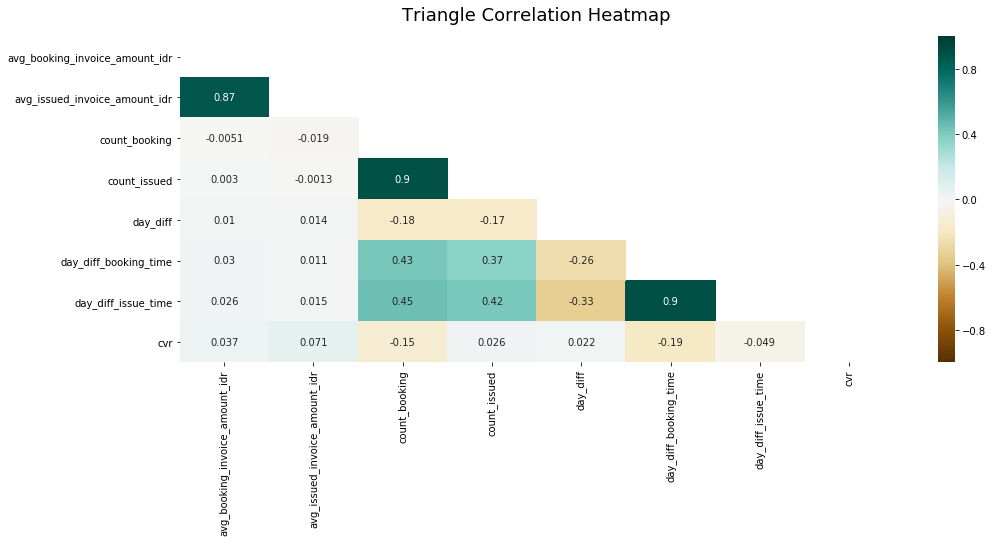

In [ ]:
## Correlation between Days Diff and Churn
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.drop([ 'profile_id', 'random_number', 'label'], axis = 1).corr(), dtype=np.bool))
heatmap = sns.heatmap(df.drop([ 'profile_id', 'random_number', 'label'], axis = 1).corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)
bottom, top = heatmap.get_ylim()
heatmap.set_ylim(bottom + 0.5, top - 0.5)

### Point-Biserial Correlation between Independent Variables and Churn Label

In [ ]:
metrics = ['avg_booking_invoice_amount_idr', 'avg_issued_invoice_amount_idr', 'count_booking', 'count_issued', 'day_diff','day_diff_booking_time', 'day_diff_issue_time', 'cvr']
result = [['Metrics', 'Point Biserial Correlation', 'P-value',  'Conclusion']]
for i in range(len(metrics)):
    a = list(stats.pointbiserialr(df[metrics[i]], df['label']))
    if a[1] < 0.05:
        z0 = 'significant'
    else:
        z0 = 'not significant'
    y = [metrics[i], a[0], a[1], z0]
    result.append(y)

fig = ff.create_table(result, index=True)

In [ ]:
fig

# Modelling - Logistic Regression

In [ ]:
## Modelling - Logistic Regression
# avg booking amount, avg invoice amt, count booking, count issued, days of churned customers
df.head()

,profile_id,primary_sales_product_type,first_booking_time,first_issued_time,last_booking_time,last_issued_time,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,...,last_updated_date,last_issued_date,last_booking_date,first_issued_date,first_booking_date,day_diff,day_diff_booking_time,day_diff_issue_time,cvr,label
0,3632279,HOTEL,2015-07-12 12:47:35.370,2016-06-19 02:44:34.396,2018-10-05 05:38:35.528,2018-10-05 05:48:02.608,2000822.71875,1193236.77778,32,18,...,2019-02-01,2018-10-05,2018-10-05,2016-06-19,2015-07-12,119.00000,1181.00000,838.00000,0.56250,0
1,3632279,FLIGHT,2014-07-18 12:30:47.701,2014-07-23 01:02:11.494,2018-12-25 10:56:35.212,2018-12-25 11:02:41.270,1174168.91379,1031981.66667,58,33,...,2019-02-01,2018-12-25,2018-12-25,2014-07-23,2014-07-18,38.00000,1621.00000,1616.00000,0.56897,0
2,17407638,TRAIN,2017-04-28 02:59:24.000,2017-04-28 03:12:27.000,2019-01-24 09:06:44.000,2019-01-24 09:40:02.000,284884.27419,252776.16667,62,24,...,2019-02-01,2019-01-24,2019-01-24,2017-04-28,2017-04-28,8.00000,636.00000,636.00000,0.38710,0
3,17407638,HOTEL,2017-04-28 06:44:53.998,2017-04-28 06:52:52.547,2019-01-16 12:39:53.838,2019-01-16 13:00:03.911,737447.19444,587505.95455,36,22,...,2019-02-01,2019-01-16,2019-01-16,2017-04-28,2017-04-28,16.00000,628.00000,628.00000,0.61111,0
4,4618047,FLIGHT,2015-01-06 02:31:13.189,2015-04-16 10:01:38.531,2019-01-06 08:31:52.498,2018-11-22 12:53:41.530,1604697.66038,1443118.30000,53,20,...,2019-02-01,2018-11-22,2019-01-06,2015-04-16,2015-01-06,71.00000,1461.00000,1316.00000,0.37736,0


In [ ]:
df.drop([ 'first_booking_time', 'first_issued_time', 'last_booking_time', 'last_issued_time', 'last_updated_date', 'last_issued_date', 'last_booking_date', 'first_issued_date', 'first_booking_date', 'random_number'], axis = 1, inplace = True)

In [ ]:
# df_flight = df_flight[df_flight['primary_sales_product_type'] == 'FLIGHT']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 206546 entries, 0 to 279148
Data columns (total 11 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   profile_id                      206546 non-null  int64  
 1   primary_sales_product_type      206546 non-null  object 
 2   avg_booking_invoice_amount_idr  206546 non-null  float64
 3   avg_issued_invoice_amount_idr   206546 non-null  float64
 4   count_booking                   206546 non-null  int64  
 5   count_issued                    206546 non-null  int64  
 6   day_diff                        206546 non-null  float64
 7   day_diff_booking_time           206546 non-null  float64
 8   day_diff_issue_time             206546 non-null  float64
 9   cvr                             206546 non-null  float64
 10  label                           206546 non-null  int32  
dtypes: float64(6), int32(1), int64(3), object(1)
memory usage: 28.1+ MB


In [ ]:
X = df.loc[:, (df.columns != 'label') & (df.columns != 'primary_sales_product_type')]
X

,profile_id,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,day_diff,day_diff_booking_time,day_diff_issue_time,cvr
0,3632279,2000822.71875,1193236.77778,32,18,119.00000,1181.00000,838.00000,0.56250
1,3632279,1174168.91379,1031981.66667,58,33,38.00000,1621.00000,1616.00000,0.56897
2,17407638,284884.27419,252776.16667,62,24,8.00000,636.00000,636.00000,0.38710
3,17407638,737447.19444,587505.95455,36,22,16.00000,628.00000,628.00000,0.61111
4,4618047,1604697.66038,1443118.30000,53,20,71.00000,1461.00000,1316.00000,0.37736
...,...,...,...,...,...,...,...,...,...
279144,18742450,816519.05556,871852.43750,18,16,376.00000,214.00000,214.00000,0.88889
279145,3384069,689568.09524,621091.31250,21,16,1132.00000,362.00000,362.00000,0.76190
279146,14557207,164833.06897,179923.81250,29,16,0.00000,436.00000,436.00000,0.55172
279147,8309553,822388.14706,794472.00000,34,16,449.00000,571.00000,519.00000,0.47059


## Check Multicollinearity

In [ ]:
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])]
    return(vif)

calc_vif(X)

,variables,VIF
0,profile_id,2.10851
1,avg_booking_invoice_amount_idr,6.30647
2,avg_issued_invoice_amount_idr,6.56013
3,count_booking,6.78771
4,count_issued,6.22977
5,day_diff,2.22991
6,day_diff_booking_time,8.92878
7,day_diff_issue_time,9.43290
8,cvr,4.44098


In [ ]:
X_new = X.drop(columns=['profile_id','day_diff_booking_time', 'avg_booking_invoice_amount_idr', 'count_booking'])
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])]
    return(vif)

calc_vif(X_new)

,variables,VIF
0,avg_issued_invoice_amount_idr,1.51436
1,count_issued,1.36140
2,day_diff,1.86376
3,day_diff_issue_time,1.68853
4,cvr,2.57408


### One Hot Encoding

In [ ]:
## One Hot Encoding
df = pd.get_dummies(df)
df.head()

,profile_id,avg_booking_invoice_amount_idr,avg_issued_invoice_amount_idr,count_booking,count_issued,day_diff,day_diff_booking_time,day_diff_issue_time,cvr,label,primary_sales_product_type_FLIGHT,primary_sales_product_type_HOTEL,primary_sales_product_type_TRAIN,primary_sales_product_type_TRIP
0,3632279,2000822.71875,1193236.77778,32,18,119.00000,1181.00000,838.00000,0.56250,0,0,1,0,0
1,3632279,1174168.91379,1031981.66667,58,33,38.00000,1621.00000,1616.00000,0.56897,0,1,0,0,0
2,17407638,284884.27419,252776.16667,62,24,8.00000,636.00000,636.00000,0.38710,0,0,0,1,0
3,17407638,737447.19444,587505.95455,36,22,16.00000,628.00000,628.00000,0.61111,0,0,1,0,0
4,4618047,1604697.66038,1443118.30000,53,20,71.00000,1461.00000,1316.00000,0.37736,0,1,0,0,0


In [ ]:
X = df.loc[:, df.columns != 'label'].drop(['avg_issued_invoice_amount_idr', 'avg_booking_invoice_amount_idr', 'cvr', 'day_diff', 'count_booking', 'day_diff_booking_time'], axis = 1)
y = df['label']

In [ ]:
cols = list(X.columns)
X

,profile_id,count_issued,day_diff_issue_time,primary_sales_product_type_FLIGHT,primary_sales_product_type_HOTEL,primary_sales_product_type_TRAIN,primary_sales_product_type_TRIP
0,3632279,18,838.00000,0,1,0,0
1,3632279,33,1616.00000,1,0,0,0
2,17407638,24,636.00000,0,0,1,0
3,17407638,22,628.00000,0,1,0,0
4,4618047,20,1316.00000,1,0,0,0
...,...,...,...,...,...,...,...
279144,18742450,16,214.00000,1,0,0,0
279145,3384069,16,362.00000,0,1,0,0
279146,14557207,16,436.00000,0,0,1,0
279147,8309553,16,519.00000,1,0,0,0


In [ ]:
X = X.drop('day_diff', axis = 1)

In [ ]:
X

,profile_id,count_booking,count_issued,day_diff_booking_time,day_diff_issue_time,primary_sales_product_type_FLIGHT,primary_sales_product_type_HOTEL,primary_sales_product_type_TRAIN,primary_sales_product_type_TRIP
0,3632279,32,18,1181.00000,838.00000,0,1,0,0
1,3632279,58,33,1621.00000,1616.00000,1,0,0,0
2,17407638,62,24,636.00000,636.00000,0,0,1,0
3,17407638,36,22,628.00000,628.00000,0,1,0,0
4,4618047,53,20,1461.00000,1316.00000,1,0,0,0
...,...,...,...,...,...,...,...,...,...
279144,18742450,18,16,214.00000,214.00000,1,0,0,0
279145,3384069,21,16,362.00000,362.00000,0,1,0,0
279146,14557207,29,16,436.00000,436.00000,0,0,1,0
279147,8309553,34,16,571.00000,519.00000,1,0,0,0


### Train and Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
train_identity = X_train['profile_id']
X_train = X_train.drop(columns = ['profile_id'])

test_identity = X_test['profile_id']
X_test = X_test.drop(columns = ['profile_id'])

### Feature Scaling

In [ ]:
## Normalize the variables
# from sklearn.preprocessing import MinMaxScaler
# mm = MinMaxScaler()
# X = pd.DataFrame(mm.fit_transform(X))

#X = StandardScaler().fit(X).transform(X)
# X

sc_X = StandardScaler()
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))
X_train2.columns = X_train.columns.values
X_train2.index = X_train.index.values
X_train = X_train2

X_test2 = pd.DataFrame(sc_X.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

### Modelling

In [ ]:
X_train

,count_issued,day_diff_issue_time,primary_sales_product_type_FLIGHT,primary_sales_product_type_HOTEL,primary_sales_product_type_TRAIN,primary_sales_product_type_TRIP
261673,9,430.00000,1,0,0,0
18719,17,693.00000,1,0,0,0
122374,1,0.00000,0,1,0,0
208458,3,55.00000,1,0,0,0
234969,5,619.00000,0,1,0,0
...,...,...,...,...,...,...
249566,7,475.00000,1,0,0,0
190555,2,286.00000,0,0,0,1
246288,6,1231.00000,1,0,0,0
116164,1,0.00000,0,0,0,1


In [ ]:
classifier = LogisticRegression(random_state =123)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)


C:\Users\Nakama\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.

C:\Users\Nakama\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



In [ ]:
classifier.coef_

array([[-0.02007025, -0.00219529,  0.65739024,  0.25996281, -0.44959416,
        -0.64366183]])

### Evaluation Metrics

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[26078, 11302],
       [ 9703, 14881]], dtype=int64)

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.73      0.70      0.71     37380
           1       0.57      0.61      0.59     24584

    accuracy                           0.66     61964
   macro avg       0.65      0.65      0.65     61964
weighted avg       0.67      0.66      0.66     61964



In [ ]:
total = sum(sum(cm))
accuracy = (cm[0,0]+cm[1,1])/total
sensitivity = cm[1,1]/(cm[1,0]+cm[1,1])
specificity = cm[0,0]/(cm[0,0]+cm[0,1])
precision = cm[1,1]/(cm[0,1]+cm[1,1])

print('Confucion Matrix : \n', cm)
print('Accuracy: ', accuracy)
print('Sensitivity: ', sensitivity)
print('Specificity: ', specificity)
print('Precision: ', precision)

# cm[0,0] --> false negative
# cm[0,1] --> false positive
# cm[1,0] --> 

Confucion Matrix : 
 [[26078 11302]
 [ 9703 14881]]
Accuracy:  0.6610128461687431
Sensitivity:  0.6053123983078424
Specificity:  0.6976457998929909
Precision:  0.5683458732765535


In [ ]:
# sensivity = dr yg actually churn, % yg predicted correctly churn
# precision = dr yang terpredidiksi churn, % yg predicted correctly churn

### Using Statsmodel

In [ ]:
 # importing libraries
import statsmodels.api as sm

# building the model and fitting the data
log_reg = sm.Logit(y_train, X_train).fit()


Optimization terminated successfully.
         Current function value: 0.597860
         Iterations 7


In [ ]:
# printing the summary table
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:               144582
Model:                          Logit   Df Residuals:                   144576
Method:                           MLE   Df Model:                            5
Date:                Fri, 14 May 2021   Pseudo R-squ.:                  0.1106
Time:                        19:58:20   Log-Likelihood:                -86440.
converged:                       True   LL-Null:                       -97191.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
count_issued                         -0.0201      0.001    -19.131      0.000      -0.022      -0.018
day_diff_issue_time                  -0.0022   2.73e-05    -80

### Plot ROC AUC Curve

C:\Users\Nakama\Anaconda3\lib\site-packages\sklearn\linear_model\base.py:291: DeprecationWarning:

`np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



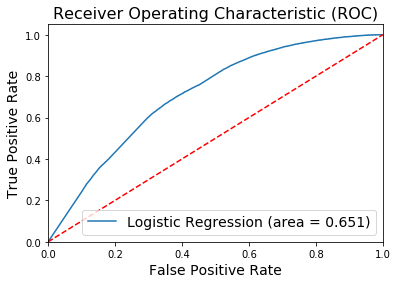

In [ ]:
# Building ROC curve
rf_roc_auc = roc_auc_score(y_test, classifier.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.3f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC)', fontsize=16)
plt.legend(loc="lower right", fontsize=14)
plt.savefig('RF_ROC', fontsize=14)
plt.show();

In [ ]:
pd.set_option('display.float_format', lambda x: '%.10f' % x)

### Feature Importance

In [ ]:
# Analyzing Coefficients
feature_importances = pd.concat([pd.DataFrame(X.drop(columns = ['profile_id']).columns, columns = ["features"]),
           pd.DataFrame(np.transpose(classifier.coef_), columns = ["coef"])
           ],axis = 1)

feature_importances.sort_values("coef", ascending = False)

,features,coef
2,primary_sales_product_type_FLIGHT,0.65739
3,primary_sales_product_type_HOTEL,0.25996
1,day_diff_issue_time,-0.00220
0,count_issued,-0.02007
4,primary_sales_product_type_TRAIN,-0.44959
5,primary_sales_product_type_TRIP,-0.64366


In [ ]:
X

,profile_id,avg_issued_invoice_amount_idr,count_issued,day_diff,day_diff_issue_time,cvr,primary_sales_product_type_FLIGHT,primary_sales_product_type_HOTEL,primary_sales_product_type_TRAIN,primary_sales_product_type_TRIP
0,3632279,1193236.77778,18,119.00000,838.00000,0.56250,0,1,0,0
1,3632279,1031981.66667,33,38.00000,1616.00000,0.56897,1,0,0,0
2,17407638,252776.16667,24,8.00000,636.00000,0.38710,0,0,1,0
3,17407638,587505.95455,22,16.00000,628.00000,0.61111,0,1,0,0
4,4618047,1443118.30000,20,71.00000,1316.00000,0.37736,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
279144,18742450,871852.43750,16,376.00000,214.00000,0.88889,1,0,0,0
279145,3384069,621091.31250,16,1132.00000,362.00000,0.76190,0,1,0,0
279146,14557207,179923.81250,16,0.00000,436.00000,0.55172,0,0,1,0
279147,8309553,794472.00000,16,449.00000,519.00000,0.47059,1,0,0,0


In [ ]:
X

,profile_id,avg_issued_invoice_amount_idr,count_issued,day_diff,day_diff_issue_time,cvr,primary_sales_product_type_FLIGHT,primary_sales_product_type_HOTEL,primary_sales_product_type_TRAIN,primary_sales_product_type_TRIP
0,3632279,1193236.77778,18,119.00000,838.00000,0.56250,0,1,0,0
1,3632279,1031981.66667,33,38.00000,1616.00000,0.56897,1,0,0,0
2,17407638,252776.16667,24,8.00000,636.00000,0.38710,0,0,1,0
3,17407638,587505.95455,22,16.00000,628.00000,0.61111,0,1,0,0
4,4618047,1443118.30000,20,71.00000,1316.00000,0.37736,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
279144,18742450,871852.43750,16,376.00000,214.00000,0.88889,1,0,0,0
279145,3384069,621091.31250,16,1132.00000,362.00000,0.76190,0,1,0,0
279146,14557207,179923.81250,16,0.00000,436.00000,0.55172,0,0,1,0
279147,8309553,794472.00000,16,449.00000,519.00000,0.47059,1,0,0,0


### Show Propensity Score

In [ ]:
#probability score
y_pred_probs = classifier.predict_proba(X_test)
y_pred_probs  = y_pred_probs [:, 1]
y_pred_probs


array([0.56228627, 0.50241133, 0.35859661, ..., 0.13956527, 0.60997331,
       0.26703055])

In [ ]:
final_results = pd.concat([test_identity, y_test], axis = 1).dropna()

final_results = pd.concat([final_results, X_test], axis = 1)

final_results['predictions'] = y_pred

final_results["propensity_to_churn(%)"] = y_pred_probs

final_results["propensity_to_churn(%)"] = final_results["propensity_to_churn(%)"]*100

final_results["propensity_to_churn(%)"]=final_results["propensity_to_churn(%)"].round(2)

final_results = final_results[['profile_id', 'primary_sales_product_type_FLIGHT','primary_sales_product_type_HOTEL',
                               'primary_sales_product_type_TRAIN', 'primary_sales_product_type_TRIP',
                               'label', 'predictions', 'propensity_to_churn(%)']]

final_results ['Ranking'] = pd.qcut(final_results['propensity_to_churn(%)'].rank(method = 'first'),10,labels=range(10,0,-1))

final_results = final_results.rename(columns={'label':'churn','primary_sales_product_type_FLIGHT': 'FLIGHT',
                                             'primary_sales_product_type_HOTEL': 'HOTEL',
                                             'primary_sales_product_type_TRAIN':'TRAIN',
                                              'primary_sales_product_type_TRIP': 'TRIP'})
final_results

,profile_id,FLIGHT,HOTEL,TRAIN,TRIP,churn,predictions,propensity_to_churn(%),Ranking
199423,58600361,1,0,0,0,0,1,56.23000,3
144626,15460235,0,1,0,0,1,1,50.24000,5
204338,15567372,1,0,0,0,0,0,35.86000,6
160287,22977874,1,0,0,0,1,1,62.13000,1
182816,7965531,0,0,0,1,1,0,35.09000,6
...,...,...,...,...,...,...,...,...,...
145456,50066900,0,1,0,0,0,1,50.24000,4
16756,8445218,1,0,0,0,0,0,3.36000,10
11478,14669528,1,0,0,0,0,0,13.96000,9
167575,50354907,1,0,0,0,0,1,61.00000,1


In [ ]:
final_results

,profile_id,label,count_issued,day_diff_issue_time,primary_sales_product_type_FLIGHT,primary_sales_product_type_HOTEL,primary_sales_product_type_TRAIN,primary_sales_product_type_TRIP
199423,58600361,0,2,69.00000,1,0,0,0
144626,15460235,1,1,0.00000,0,1,0,0
204338,15567372,0,3,439.00000,1,0,0,0
160287,22977874,1,1,0.00000,1,0,0,0
182816,7965531,1,2,27.00000,0,0,0,1
...,...,...,...,...,...,...,...,...
145456,50066900,0,1,0.00000,0,1,0,0
16756,8445218,0,75,1056.00000,1,0,0,0
11478,14669528,0,34,723.00000,1,0,0,0
167575,50354907,0,2,8.00000,1,0,0,0


In [ ]:
final_results.groupby('Ranking').nunique()

,profile_id,churn,predictions,propensity_to_churn(%)
Ranking,,,,
10,5736,2,1,1203
9,5935,2,1,991
8,6049,2,1,906
7,6115,2,1,298
6,6049,2,1,843
5,6101,2,2,753
4,6184,2,2,126
3,6137,2,2,796
2,6193,2,2,71
